### Carga de los Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gzip
%matplotlib inline

# Cargar el archivo CSV comprimido ignorando líneas con errores
with gzip.open(
    "./Challenge/cityA_groundtruthdata.csv/cityA_groundtruthdata.csv", "rt", encoding="ISO-8859-1"
) as f:
    df = pd.read_csv(f, on_bad_lines="skip")

# Mostrar las primeras filas del DataFrame para verificar
df.head()

,uid,d,t,x,y
0,0,0,1,79,86
1,0,0,2,79,86
2,0,0,8,77,86
3,0,0,9,77,86
4,0,0,19,81,89


### Estadisticas de los datos

In [2]:
# Ver las dimensiones del DataFrame (filas y columnas)
print(f"Dimensiones del DataFrame: {df.shape}")

# Ver los nombres de las columnas y sus tipos de datos
print("\nInformación del DataFrame:")
display(df.info())  # display() para mejor presentación en notebooks

# Mostrar las primeras filas del DataFrame
print("\nPrimeras 5 filas del DataFrame:")
display(df.head(75))  # Mejor presentación en notebook

# Verificar si hay valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Resumen estadístico de los datos numéricos
print("\nResumen estadístico:")
display(df.describe())

top_users = df["uid"].value_counts().head(10)
print("Usuarios más activos:\n", top_users)

Dimensiones del DataFrame: (111535175, 5)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111535175 entries, 0 to 111535174
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   uid     int64
 1   d       int64
 2   t       int64
 3   x       int64
 4   y       int64
dtypes: int64(5)
memory usage: 4.2 GB


None


Primeras 5 filas del DataFrame:


,uid,d,t,x,y
0,0,0,1,79,86
1,0,0,2,79,86
2,0,0,8,77,86
3,0,0,9,77,86
4,0,0,19,81,89
...,...,...,...,...,...
70,0,3,38,76,83
71,0,3,39,76,84
72,0,3,40,77,86
73,0,3,46,79,87



Valores nulos por columna:
uid    0
d      0
t      0
x      0
y      0
dtype: int64

Resumen estadístico:


,uid,d,t,x,y
count,1.115352e+08,1.115352e+08,1.115352e+08,1.115352e+08,1.115352e+08
mean,4.917461e+04,3.740868e+01,2.596529e+01,1.229079e+02,8.565036e+01
std,2.881183e+04,2.168145e+01,1.116733e+01,4.209912e+01,4.281913e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2.393200e+04,1.900000e+01,1.800000e+01,9.500000e+01,5.800000e+01
50%,4.925800e+04,3.800000e+01,2.600000e+01,1.270000e+02,8.400000e+01
75%,7.392900e+04,5.700000e+01,3.500000e+01,1.550000e+02,1.110000e+02
max,9.999900e+04,7.400000e+01,4.700000e+01,2.000000e+02,2.000000e+02


Usuarios más activos:
 uid
62023    3497
63991    3456
62164    3431
63726    3367
2716     3358
2041     3335
56979    3333
963      3302
63484    3295
67216    3285
Name: count, dtype: int64


### Histograma bidimensional del número de pings y del número de usuarios únicos observados a lo largo de los 75 días.

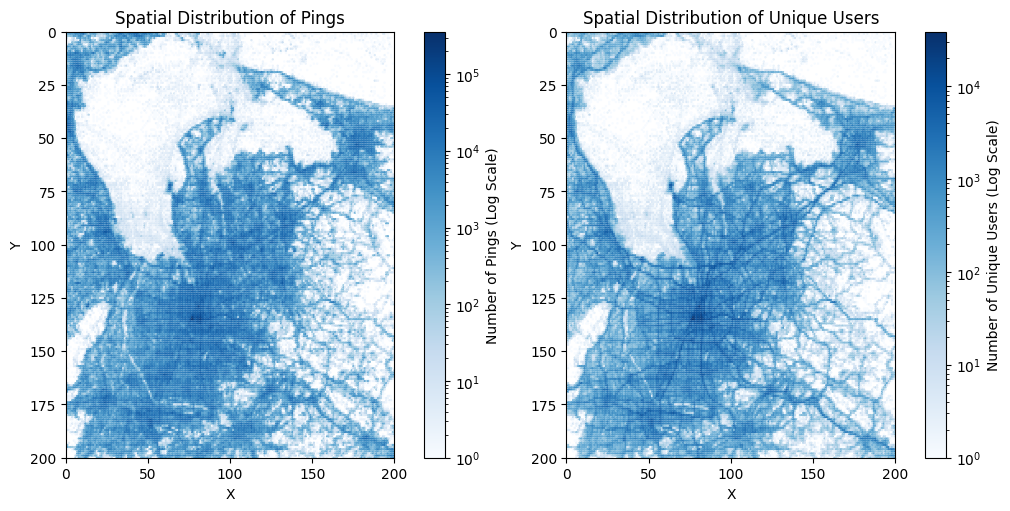

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Contar pings por celda (x, y)
pings_per_cell = df.groupby(["x", "y"]).size()

# Contar usuarios únicos por celda (x, y)
unique_users_per_cell = df.groupby(["x", "y"])["uid"].nunique()

# Preparar las coordenadas
x_coords = pings_per_cell.index.get_level_values(1)
y_coords = pings_per_cell.index.get_level_values(0)

# Crear subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Gráfico 1: Distribución espacial de pings
sc1 = axes[0].scatter(
    x_coords,
    y_coords,
    c=pings_per_cell.values,
    cmap="Blues",
    s=0.5,
    alpha=1,
    norm=mcolors.LogNorm(),
)
axes[0].set_title("Spatial Distribution of Pings")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_xlim(0, 200)
axes[0].set_ylim(200, 0)
fig.colorbar(sc1, ax=axes[0], label="Number of Pings (Log Scale)")

# Gráfico 2: Distribución espacial de usuarios únicos
sc2 = axes[1].scatter(
    unique_users_per_cell.index.get_level_values(1),
    unique_users_per_cell.index.get_level_values(0),
    c=unique_users_per_cell.values,
    cmap="Blues",
    s=0.5,
    alpha=1,
    norm=mcolors.LogNorm(),
)
axes[1].set_title("Spatial Distribution of Unique Users")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_xlim(0, 200)
axes[1].set_ylim(200, 0)
fig.colorbar(sc2, ax=axes[1], label="Number of Unique Users (Log Scale)")

fig.savefig("spatial_distribution_high_res.png", dpi=600, bbox_inches="tight")


plt.show()

### Dinámica temporal del número de pings y usuarios únicos por día

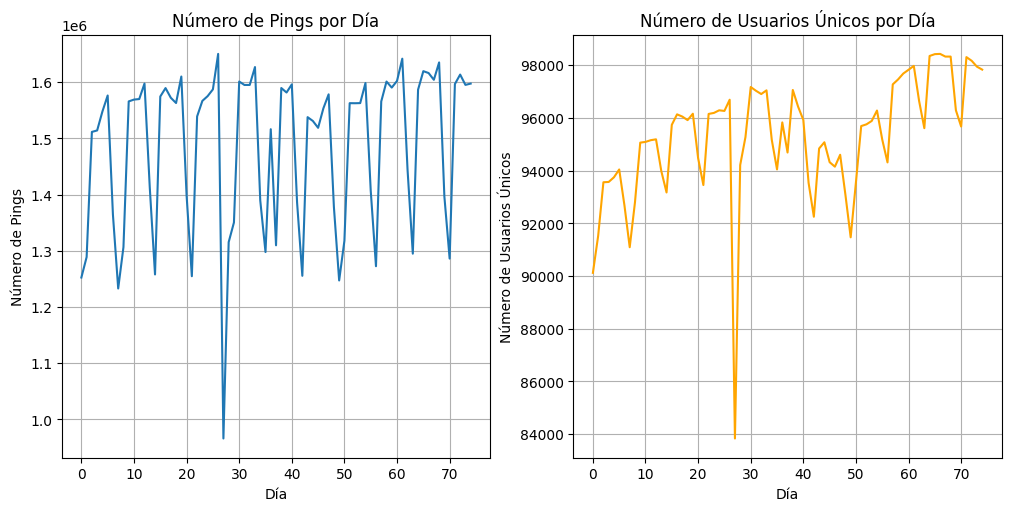

In [4]:
# 1. Contar el número de movimientos (pings) por día
df_per_day = df.groupby("d").size()

# 2. Contar el número de usuarios únicos por día
unique_users_per_day = df.groupby("d")["uid"].nunique()

# Crear los subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Gráfico 1: Número de movimientos (pings) por día
axes[0].plot(df_per_day, linestyle="-", markersize=4)
axes[0].set_title("Número de Pings por Día")
axes[0].set_xlabel("Día")
axes[0].set_ylabel("Número de Pings")
axes[0].grid(True)

# Gráfico 2: Número de usuarios únicos por día
axes[1].plot(unique_users_per_day, linestyle="-", markersize=4, color="orange")
axes[1].set_title("Número de Usuarios Únicos por Día")
axes[1].set_xlabel("Día")
axes[1].set_ylabel("Número de Usuarios Únicos")
axes[1].grid(True)

fig.savefig("pings.png", dpi=600, bbox_inches="tight")

# Mostrar los gráficos
plt.show()

### Histogramas del número de pings de datos de ubicación GPS y del número de celdas únicas visitadas por usuario, a lo largo del período de 75 días

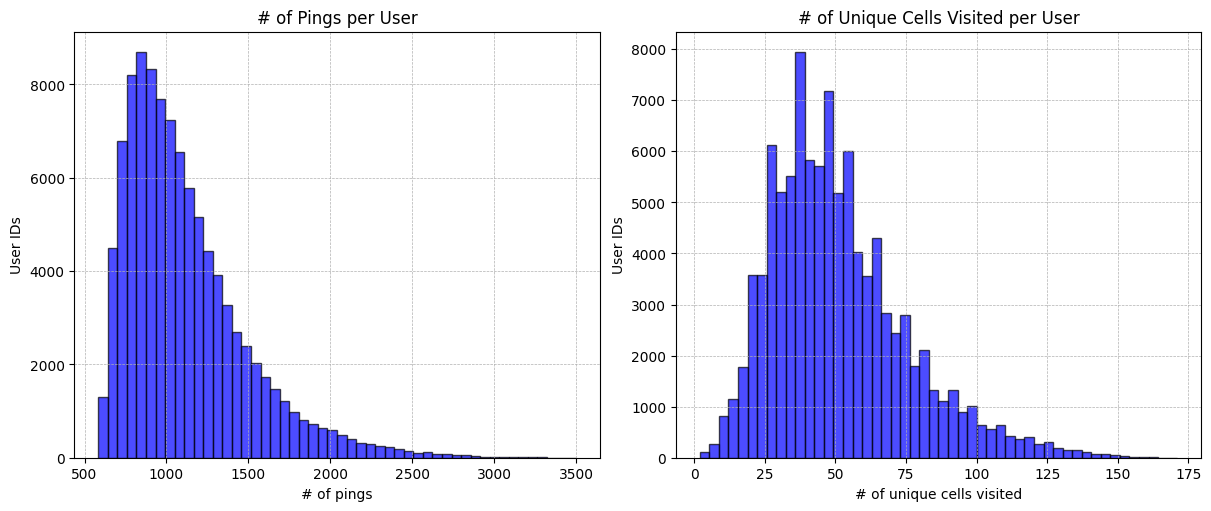

In [5]:
import matplotlib.pyplot as plt

# Preparar los datos
pings_per_user = df.groupby("uid").size()  # Número de pings por usuario
unique_cells_per_user = (
    df.groupby("uid")[["x", "y"]].nunique().min(axis=1)
)  # Número de celdas únicas visitadas por usuario

# Crear subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Gráfico 1: Histograma del número de pings por usuario
axes[0].hist(pings_per_user, bins=50, color="blue", edgecolor="black", alpha=0.7)
axes[0].set_title("# of Pings per User")
axes[0].set_xlabel("# of pings")
axes[0].set_ylabel("User IDs")
axes[0].grid(True, which="both", linestyle="--", linewidth=0.5)

# Gráfico 2: Histograma del número de celdas únicas visitadas por usuario
axes[1].hist(unique_cells_per_user, bins=50, color="blue", edgecolor="black", alpha=0.7)
axes[1].set_title("# of Unique Cells Visited per User")
axes[1].set_xlabel("# of unique cells visited")
axes[1].set_ylabel("User IDs")
axes[1].grid(True, which="both", linestyle="--", linewidth=0.5)

fig.savefig("pings_per_user.png", dpi=600, bbox_inches="tight")

# Mostrar los gráficos
plt.show()

### Histogramas del número de pings de datos de ubicación GPS y del número de usuarios únicos que visitaron cada celda de la cuadrícula, a lo largo del período de 75 días

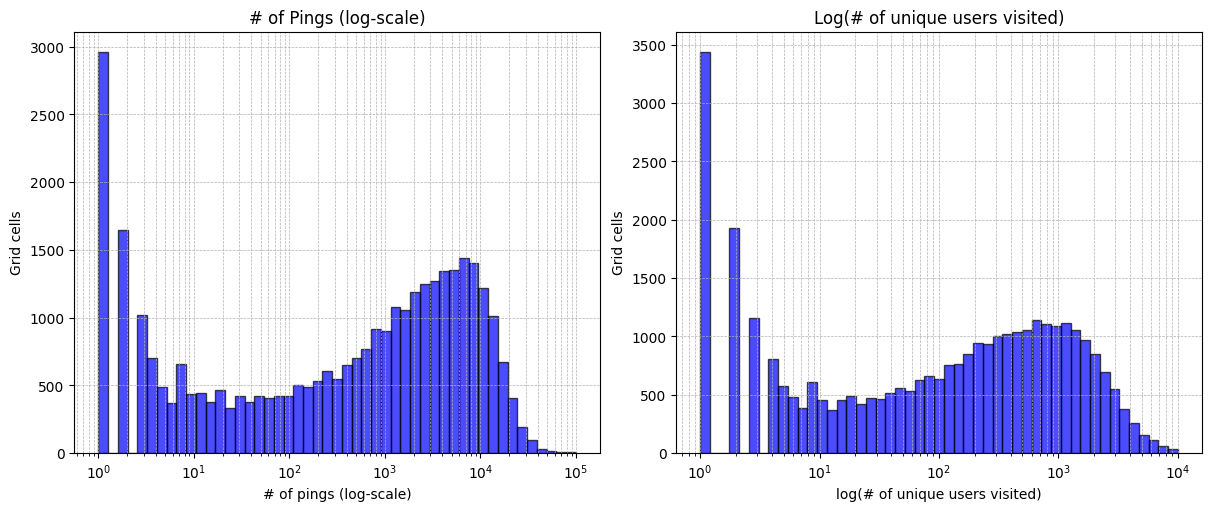

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Preparar los datos
pings_per_cell = df.groupby(["x", "y"]).size()
unique_users_per_cell = df.groupby(["x", "y"])["uid"].nunique()

# Crear subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Gráfico 1: Histograma del número de pings por celda
axes[0].hist(
    pings_per_cell,
    bins=np.logspace(0, 5, 50),
    color="blue",
    edgecolor="black",
    alpha=0.7,
)
axes[0].set_xscale("log")  # Escala logarítmica en el eje X
axes[0].set_title("# of Pings (log-scale)")
axes[0].set_xlabel("# of pings (log-scale)")
axes[0].set_ylabel("Grid cells")
axes[0].grid(True, which="both", linestyle="--", linewidth=0.5)

# Gráfico 2: Histograma del número de usuarios únicos por celda
axes[1].hist(
    unique_users_per_cell,
    bins=np.logspace(0, 4, 50),
    color="blue",
    edgecolor="black",
    alpha=0.7,
)
axes[1].set_xscale("log")  # Escala logarítmica en el eje X
axes[1].set_title("Log(# of unique users visited)")
axes[1].set_xlabel("log(# of unique users visited)")
axes[1].set_ylabel("Grid cells")
axes[1].grid(True, which="both", linestyle="--", linewidth=0.5)

fig.savefig("users_visited.png", dpi=600, bbox_inches="tight")

# Mostrar los gráficos
plt.show()

### Dinámica temporal del número de pings y usuarios únicos por intervalo de tiempo

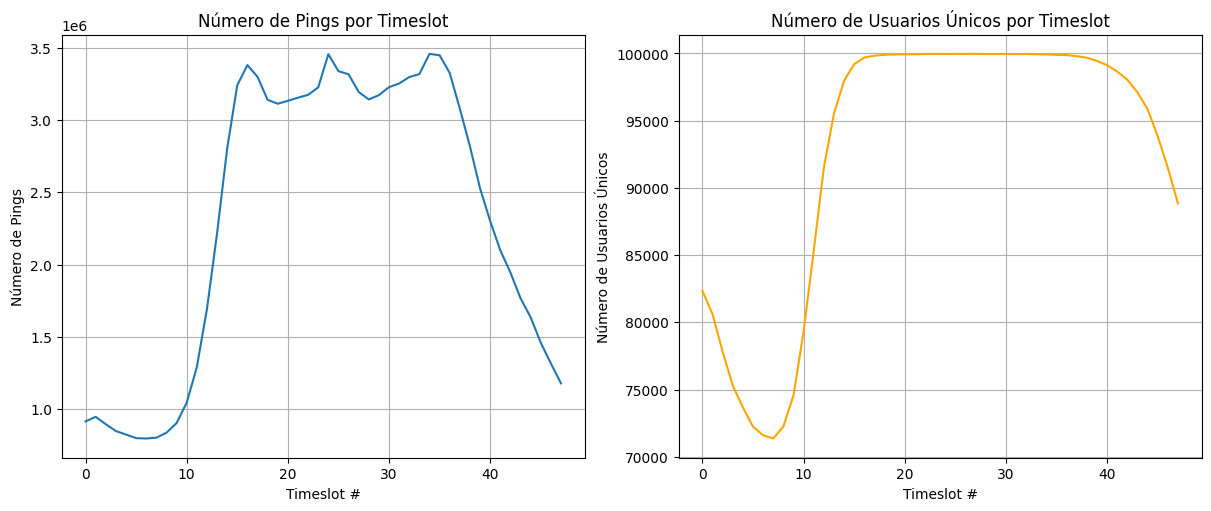

In [7]:
import matplotlib.pyplot as plt

# 1. Contar el número de pings por timeslot (t)
pings_per_timeslot = df.groupby("t").size()

# 2. Contar el número de usuarios únicos por timeslot (t)
unique_users_per_timeslot = df.groupby("t")["uid"].nunique()

# Crear subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Gráfico 1: Número de Pings por Timeslot
axes[0].plot(pings_per_timeslot, linestyle="-", markersize=4)
axes[0].set_title("Número de Pings por Timeslot")
axes[0].set_xlabel("Timeslot #")
axes[0].set_ylabel("Número de Pings")
axes[0].grid(True)

# Gráfico 2: Número de Usuarios Únicos por Timeslot
axes[1].plot(unique_users_per_timeslot, linestyle="-", markersize=4, color="orange")
axes[1].set_title("Número de Usuarios Únicos por Timeslot")
axes[1].set_xlabel("Timeslot #")
axes[1].set_ylabel("Número de Usuarios Únicos")
axes[1].grid(True)

fig.savefig("pings_per_Timeslot", dpi=600, bbox_inches="tight")

# Mostrar los gráficos
plt.show()

### Histograma 2D: Diferenciación entre Áreas Urbanas (Áreas de alta densidad en rojo ) y Rurales (Áreas de baja densidad en azul )

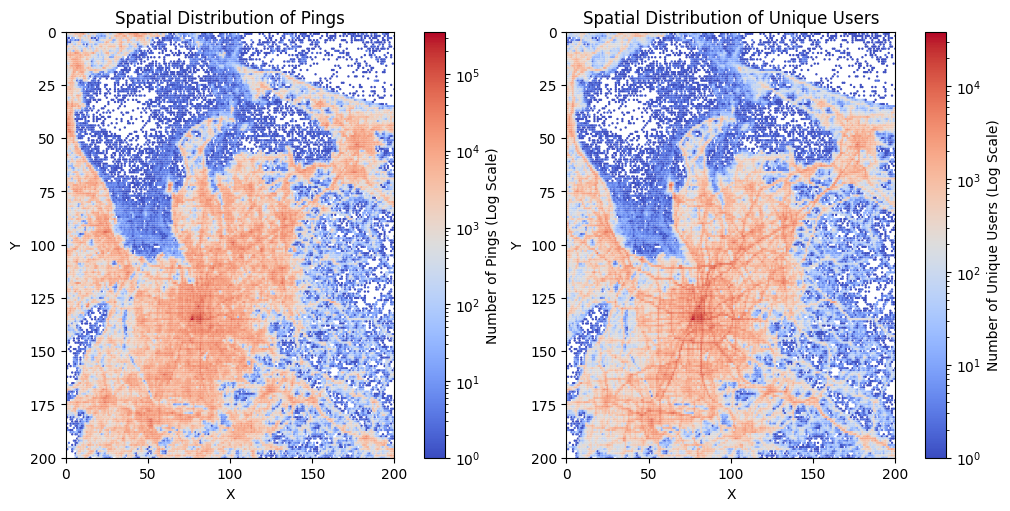

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Contar pings por celda (x, y)
pings_per_cell = df.groupby(["x", "y"]).size()

# Contar usuarios únicos por celda (x, y)
unique_users_per_cell = df.groupby(["x", "y"])["uid"].nunique()

# Preparar las coordenadas
x_coords = pings_per_cell.index.get_level_values(1)
y_coords = pings_per_cell.index.get_level_values(0)

# Crear subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Gráfico 1: Distribución espacial de pings
sc1 = axes[0].scatter(
    x_coords,
    y_coords,
    c=pings_per_cell.values,
    cmap="coolwarm",
    s=0.5,
    alpha=1,
    norm=mcolors.LogNorm(),
)
axes[0].set_title("Spatial Distribution of Pings")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_xlim(0, 200)
axes[0].set_ylim(200, 0)
fig.colorbar(sc1, ax=axes[0], label="Number of Pings (Log Scale)")

# Gráfico 2: Distribución espacial de usuarios únicos
sc2 = axes[1].scatter(
    unique_users_per_cell.index.get_level_values(1),
    unique_users_per_cell.index.get_level_values(0),
    c=unique_users_per_cell.values,
    cmap="coolwarm",
    s=0.5,
    alpha=1,
    norm=mcolors.LogNorm(),
)
axes[1].set_title("Spatial Distribution of Unique Users")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_xlim(0, 200)
axes[1].set_ylim(200, 0)
fig.colorbar(sc2, ax=axes[1], label="Number of Unique Users (Log Scale)")

fig.savefig("spatial_distribution_of_pings_color.png", dpi=600, bbox_inches="tight")

# Mostrar los gráficos
plt.show()